# About Dataset

The dataset is from the results of aggregating data by ai-jobs.net. ai-jobs.net is a platform that offers applicant to apply AI/ML and Big Data jobs everywhere in the world. The dataset has been obtained by giving forms to everyone who has AI/ML and Big Data jobs to fill salary data out transparently. So, everyone can use it to learn and analyze more about it.
Data Science Job Salaries contains 11 columns as follows.
* **work_year** = The year the salary was paid.
* **experience_level** = The experience level in the job during the year with the following possible values.
  * EN = Entry-level / Junior
  * MI = Mid-level / Intermediate
  * SE = Senior-level / Expert 
  * EX = Executive-level / Director
* **employment_type** = The type of employement for the role.
  * PT = Part-time 
  * FT = Full-time 
  * CT = Contract 
  * FL = Freelance
* **job_title** = The role worked in during the year.
* **salary** = The total gross salary amount paid.
* **salary_currency** = The currency of the salary paid as an ISO 4217 currency code.
* **salary_in_usd** = The salary in USD (FX rate divided by avg. USD rate for the respective year via fxdata.foorilla.com).
* **employee_residence** = Employee's primary country of residence in during the work year as an ISO 3166 country code.
* **remote_ratio** = The overall amount of work done remotely, possible values are as follows.
  * 0   = No remote work (less than 20%) 
  * 50  = Partially remote 
  * 100 = Fully remote (more than 80%)
* **company_location** = The country of the employer's main office or contracting branch as an ISO 3166 country code.
* **company_size** = The average number of people that worked for the company during the year
  * S = less than 50 employees (small) 
  * M = 50 to 250 employees (medium) 
  * L = more than 250 employees (large)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 

In [2]:
data = pd.read_csv("ds_salaries.csv")
data.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


# Cleaning Data 

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


In [4]:
data.isna().sum()

Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [5]:
data.duplicated().sum()

0

In [6]:
data.head(2)

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S


In [7]:
data.drop(columns=["Unnamed: 0" , "salary" , "salary_currency" , "employee_residence"] , inplace=True , axis = 1 )

In [8]:
data.head(2)

,work_year,experience_level,employment_type,job_title,salary_in_usd,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,79833,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,0,JP,S


In [9]:
data.rename(columns={"salary_in_usd" :"salary"}, inplace=True)

In [10]:
data.head(2)

,work_year,experience_level,employment_type,job_title,salary,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,79833,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,0,JP,S


In [11]:
data["job_title"].unique()

array(['Data Scientist', 'Machine Learning Scientist',
       'Big Data Engineer', 'Product Data Analyst',
       'Machine Learning Engineer', 'Data Analyst', 'Lead Data Scientist',
       'Business Data Analyst', 'Lead Data Engineer', 'Lead Data Analyst',
       'Data Engineer', 'Data Science Consultant', 'BI Data Analyst',
       'Director of Data Science', 'Research Scientist',
       'Machine Learning Manager', 'Data Engineering Manager',
       'Machine Learning Infrastructure Engineer', 'ML Engineer',
       'AI Scientist', 'Computer Vision Engineer',
       'Principal Data Scientist', 'Data Science Manager', 'Head of Data',
       '3D Computer Vision Researcher', 'Data Analytics Engineer',
       'Applied Data Scientist', 'Marketing Data Analyst',
       'Cloud Data Engineer', 'Financial Data Analyst',
       'Computer Vision Software Engineer',
       'Director of Data Engineering', 'Data Science Engineer',
       'Principal Data Engineer', 'Machine Learning Developer',
       

In [12]:
data["company_location"].unique()

array(['DE', 'JP', 'GB', 'HN', 'US', 'HU', 'NZ', 'FR', 'IN', 'PK', 'CN',
       'GR', 'AE', 'NL', 'MX', 'CA', 'AT', 'NG', 'ES', 'PT', 'DK', 'IT',
       'HR', 'LU', 'PL', 'SG', 'RO', 'IQ', 'BR', 'BE', 'UA', 'IL', 'RU',
       'MT', 'CL', 'IR', 'CO', 'MD', 'KE', 'SI', 'CH', 'VN', 'AS', 'TR',
       'CZ', 'DZ', 'EE', 'MY', 'AU', 'IE'], dtype=object)

In [13]:
data["experience_level"].unique()

array(['MI', 'SE', 'EN', 'EX'], dtype=object)

In [14]:
data["employment_type"].unique()

array(['FT', 'CT', 'PT', 'FL'], dtype=object)

In [15]:
data.to_csv("data_sceince_salary_job.csv")

# Exploratory Data Analysis

In [16]:
data.head(2)

,work_year,experience_level,employment_type,job_title,salary,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,79833,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,0,JP,S


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   work_year         607 non-null    int64 
 1   experience_level  607 non-null    object
 2   employment_type   607 non-null    object
 3   job_title         607 non-null    object
 4   salary            607 non-null    int64 
 5   remote_ratio      607 non-null    int64 
 6   company_location  607 non-null    object
 7   company_size      607 non-null    object
dtypes: int64(3), object(5)
memory usage: 38.1+ KB


In [18]:
data.salary.describe()

count       607.000000
mean     112297.869852
std       70957.259411
min        2859.000000
25%       62726.000000
50%      101570.000000
75%      150000.000000
max      600000.000000
Name: salary, dtype: float64

In [19]:
data.work_year.unique()

array([2020, 2021, 2022], dtype=int64)

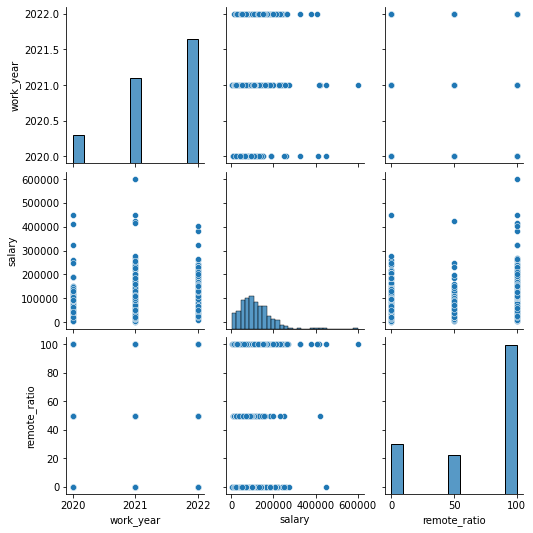

In [42]:
sns.pairplot(data);

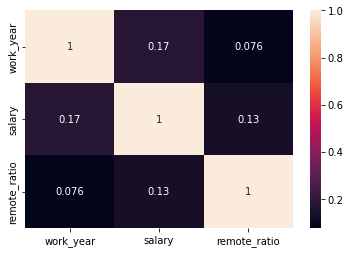

In [30]:
sns.heatmap(data.corr() , annot=True);

In [20]:
data.groupby("work_year").salary.sum()

work_year
2020     6898536
2021    21668273
2022    39597998
Name: salary, dtype: int64

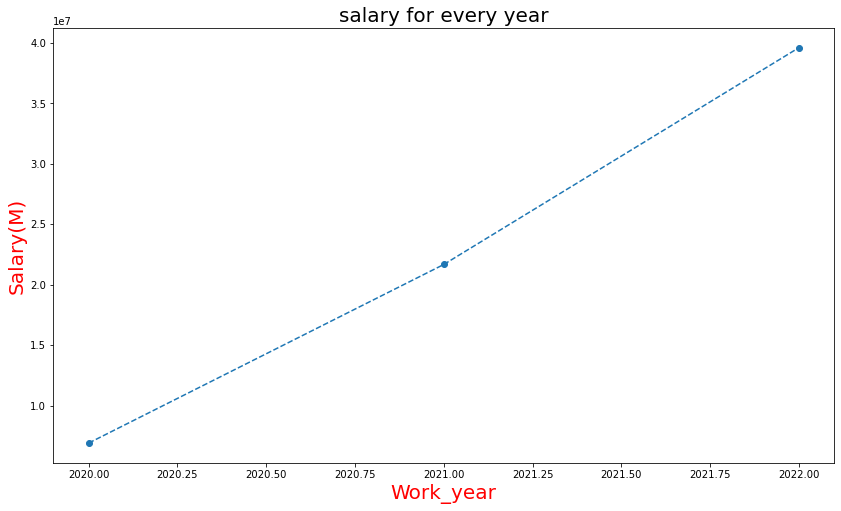

In [26]:
plt.figure(figsize=(14 , 8))

plt.plot(data.groupby("work_year").salary.sum() , linestyle= "--" , marker= "o")

plt.title("salary for every year" , fontsize= 20 )

plt.xlabel("Work_year" , fontsize= 20 , color= "r")
plt.ylabel("Salary(M)" , fontsize= 20 , color= "r")

plt.show()

# What is the most popular experience of all years?

In [22]:
data.replace(['MI', 'SE', 'EN', 'EX'] , ["Intermediate" , "Expert", "Junior" , "Director"] , inplace=True)
data.experience_level.value_counts()

Expert          280
Intermediate    213
Junior           88
Director         26
Name: experience_level, dtype: int64

In [23]:
data.experience_level.unique()
# EN = Entry-level / Junior
# MI = Mid-level / Intermediate
# SE = Senior-level / Expert
# EX = Executive-level / Director

array(['Intermediate', 'Expert', 'Junior', 'Director'], dtype=object)

Text(0, 0.5, 'work_year and experience level')

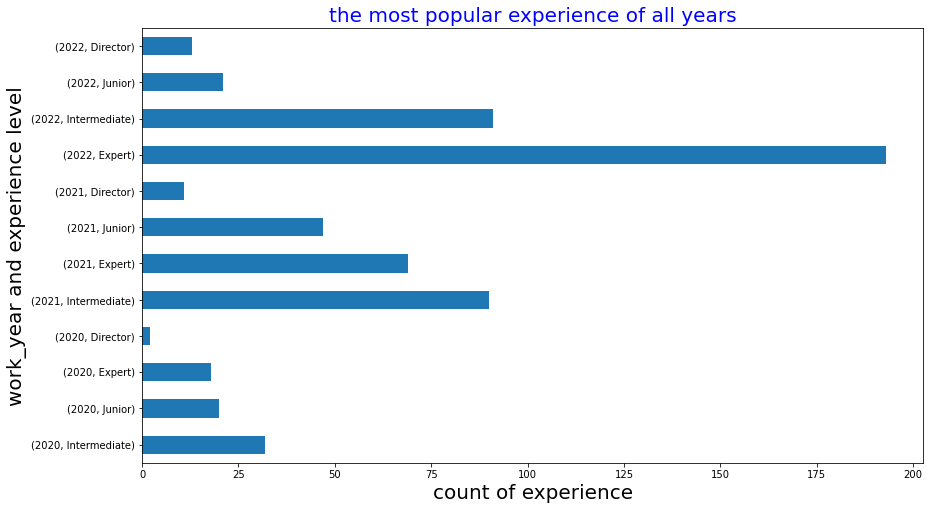

In [24]:
plt.figure(figsize=(14 , 8))
data.groupby("work_year").experience_level.value_counts().plot.barh();

plt.title("the most popular experience of all years" , fontsize=20 , color= "b")

plt.xlabel("count of experience" , fontsize= 20)
plt.ylabel("work_year and experience level" , fontsize= 20)

# Salary for every job

In [25]:
data.head(2)

,work_year,experience_level,employment_type,job_title,salary,remote_ratio,company_location,company_size
0,2020,Intermediate,FT,Data Scientist,79833,0,DE,L
1,2020,Expert,FT,Machine Learning Scientist,260000,0,JP,S


In [36]:
ss= data.groupby("employment_type").salary.sum()
ss

employment_type
CT      922875
FL      192000
FT    66719227
PT      330705
Name: salary, dtype: int64

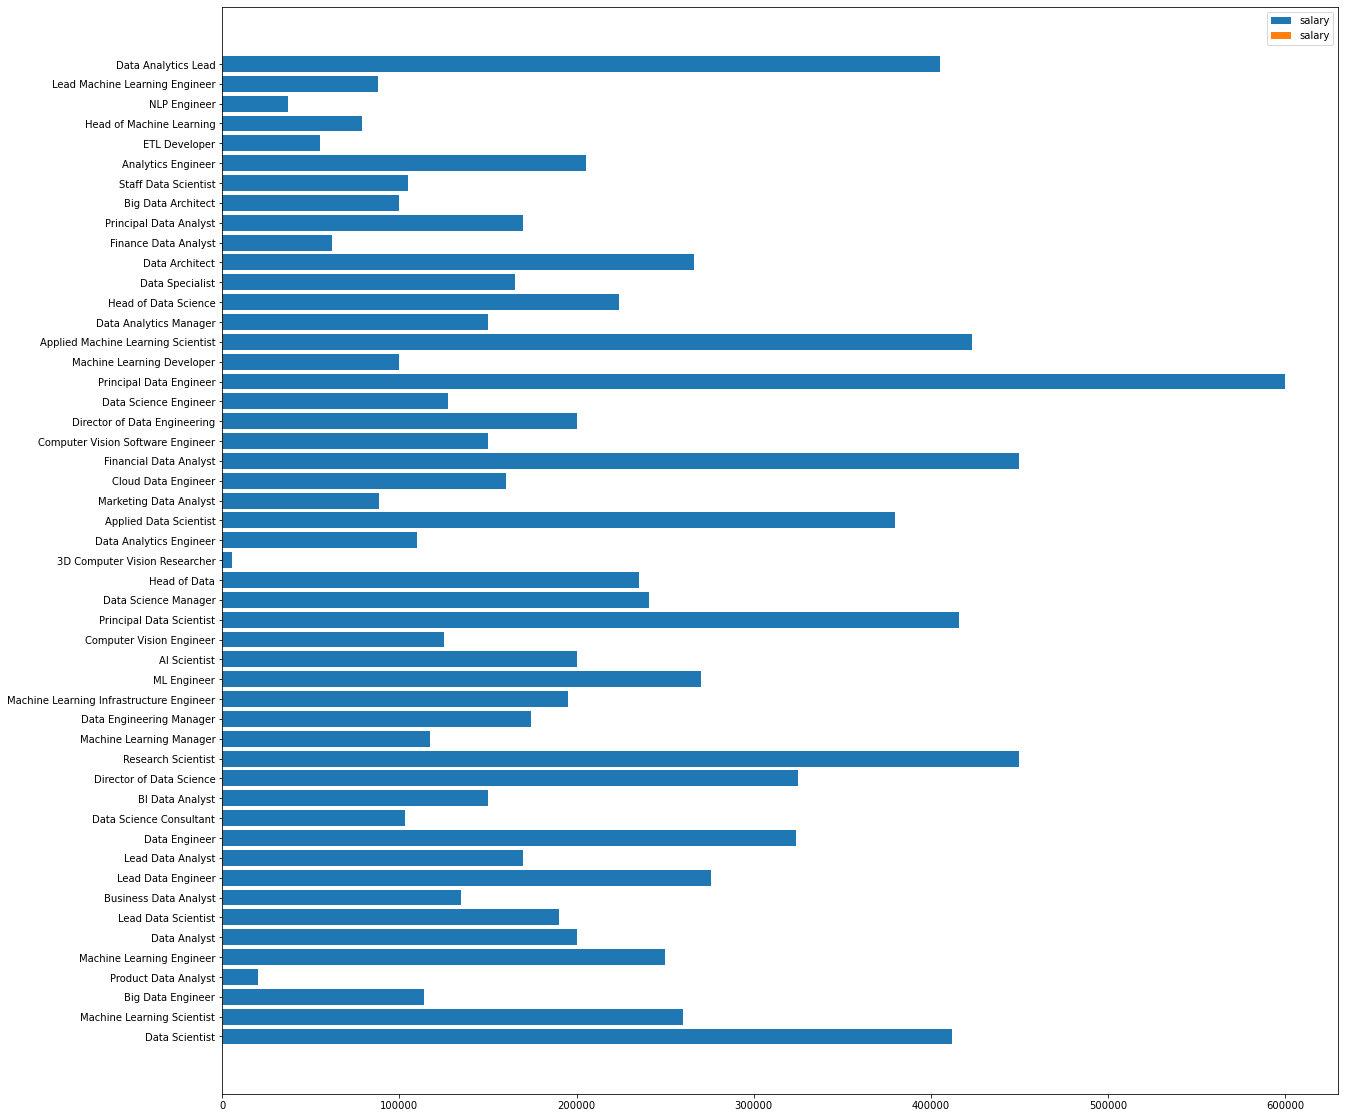

In [30]:
plt.figure(figsize= (20 , 20))
plt.barh(width=data.salary , y=data.job_title, label= "salary")
plt.barh(width=data.remote_ratio , y=data.job_title , label= "salary")

plt.legend()
plt.ylabel("")

plt.show()

# The case of every Job from Remot Ratio

Text(0, 0.5, 'count of remote_ratio')

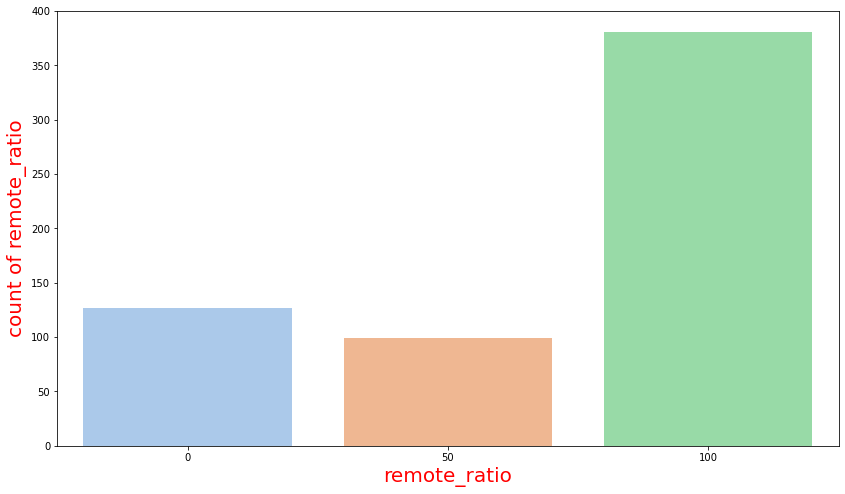

In [31]:
plt.figure(figsize=(14 , 8));
sns.countplot(x= "remote_ratio" , data=data , palette="pastel" );

plt.xlabel("remote_ratio" , fontsize= 20 , color= "red")
plt.ylabel("count of remote_ratio" , fontsize= 20 , color= "red")

# Salary for Every Company Location

In [31]:
data.head(2)

,work_year,experience_level,employment_type,job_title,salary,remote_ratio,company_location,company_size
0,2020,Intermediate,FT,Data Scientist,79833,0,DE,L
1,2020,Expert,FT,Machine Learning Scientist,260000,0,JP,S


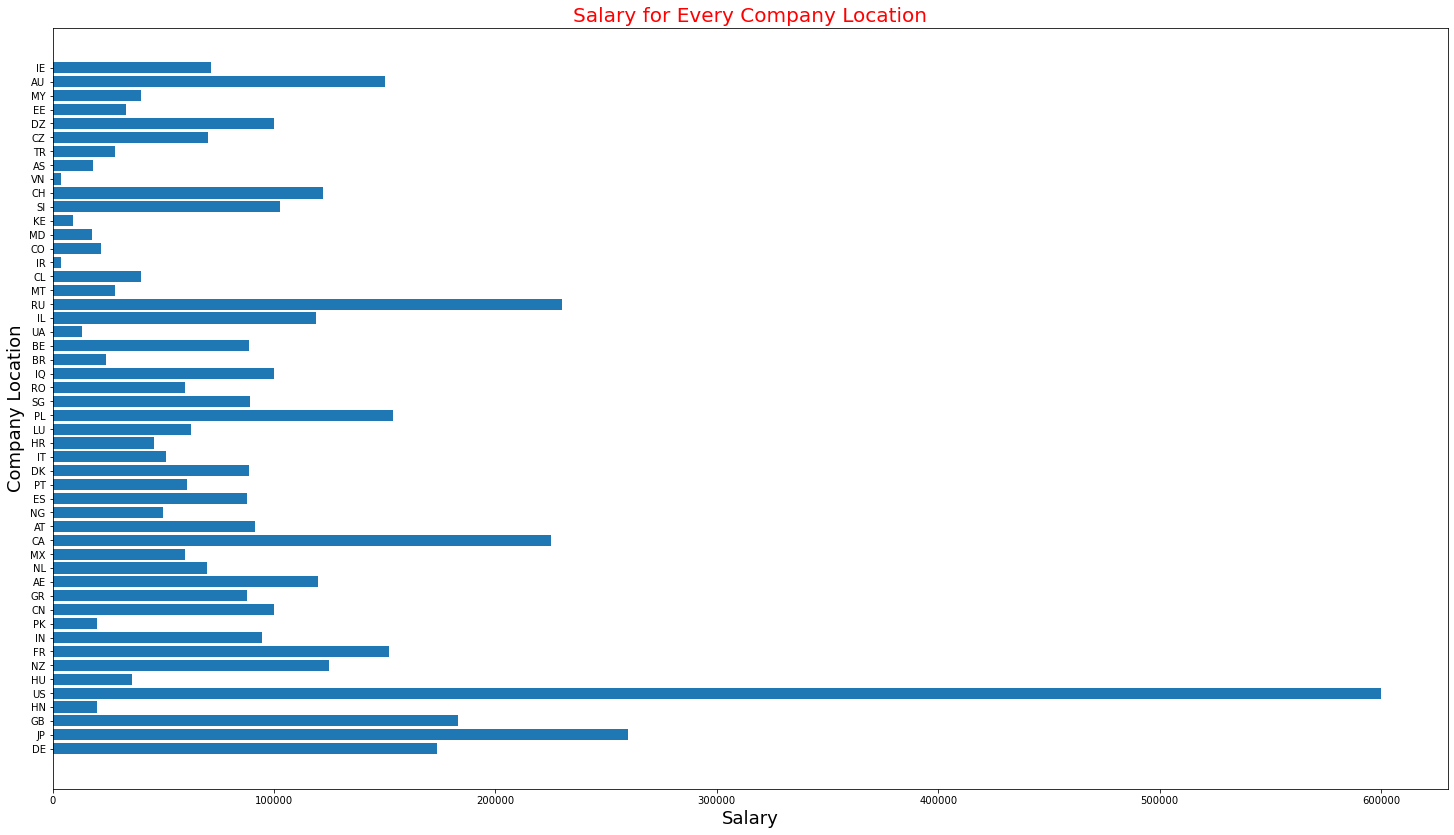

In [37]:
plt.figure(figsize=(25, 14))

plt.barh(y= "company_location" , width="salary" , data= data)

plt.xlabel("Salary", fontsize= 18)
plt.ylabel("Company Location", fontsize= 18)

plt.title("Salary for Every Company Location", fontsize= 20 , c= "r")
plt.show()

Text(0, 0.5, 'salary')

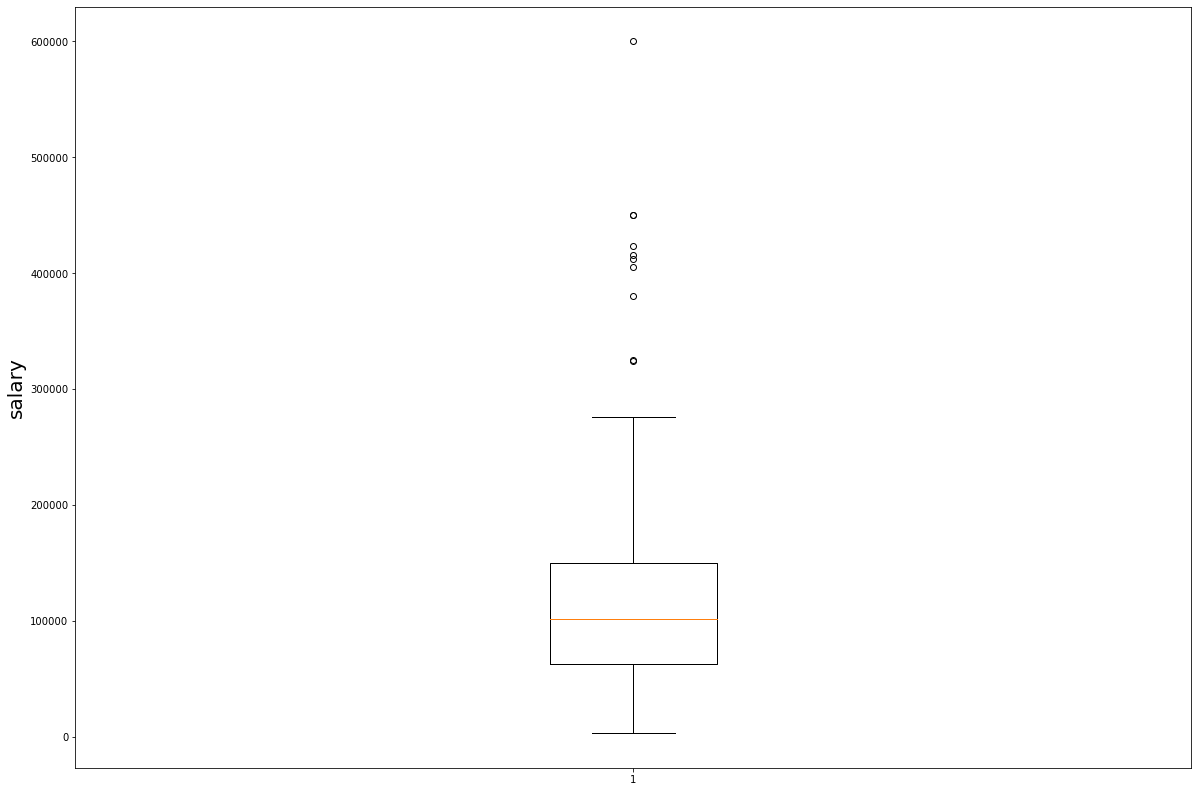

In [48]:
plt.figure(figsize=(20, 14))
plt.boxplot(data.salary);

plt.ylabel("salary" , fontsize= 20)